In [1]:

import numpy as np
import skimage.morphology as morpho  
from skimage import img_as_float
import matplotlib.pyplot as plt
import cv2
from tools import *
from Patch_priorities import *
from iter_algo import *
import torch

# Kasbah of the Udayas

In [34]:
image = cv2.imread('Oudaya.jpg', 1)

In [63]:
mask_1 = mask(image, 250, 300, 180+35, 208+35)

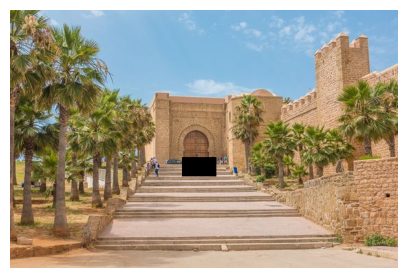

In [64]:
new_img = delete_zone(image, mask_1)
view_data(new_img)

C:\Users\oumai\AppData\Local\Temp\ipykernel_28432\92417583.py:16: RuntimeWarning: invalid value encountered in scalar divide
  c[k,l]=np.sum(patch)/(patch.shape[0]*patch.shape[1])


Iteration 0 completed


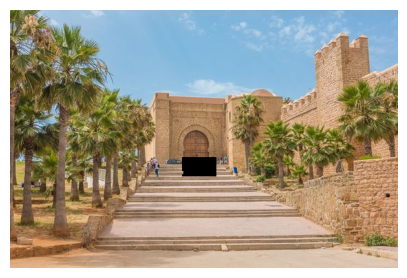

Iteration 10 completed


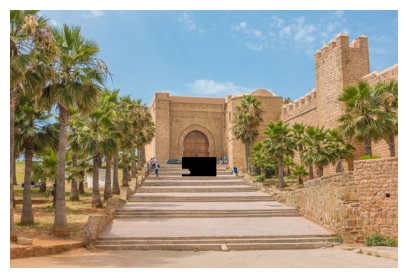

Iteration 20 completed


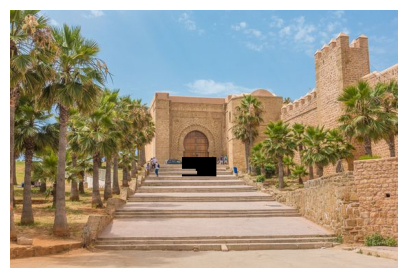

Iteration 30 completed


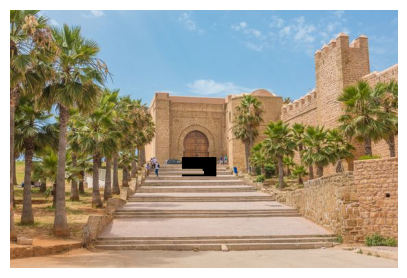

Iteration 40 completed


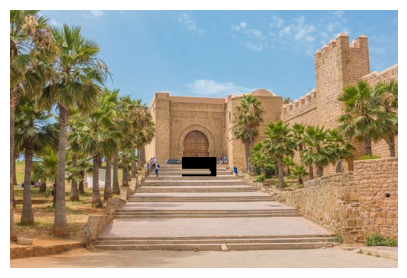

Iteration 50 completed


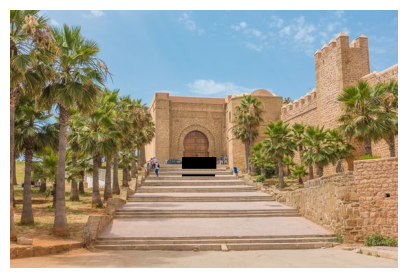

Iteration 60 completed


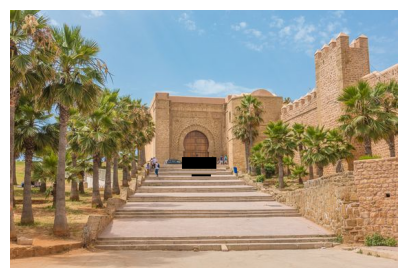

Iteration 70 completed


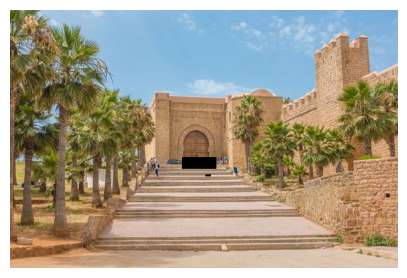

Iteration 80 completed


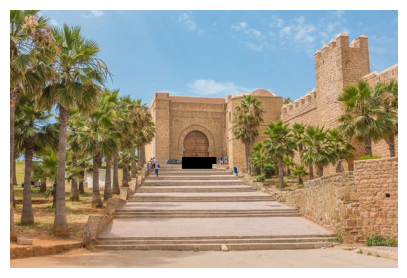

Iteration 90 completed


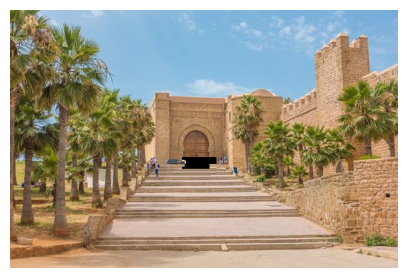

Iteration 100 completed


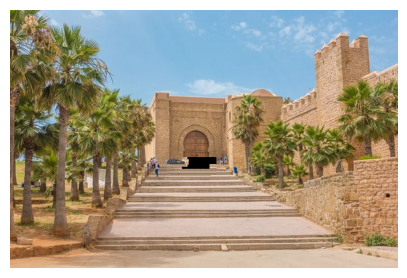

Iteration 110 completed


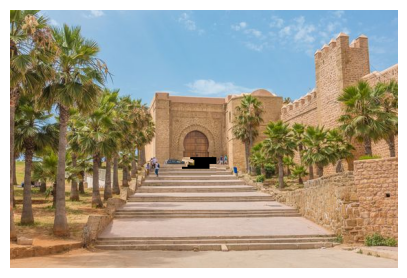

Iteration 120 completed


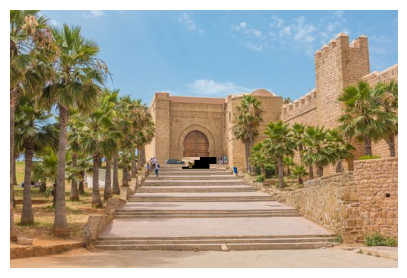

Iteration 130 completed


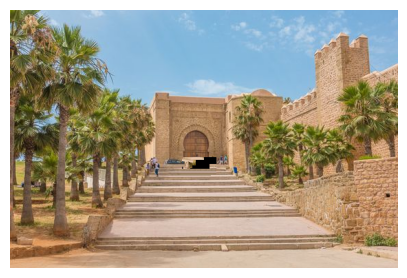

Iteration 140 completed


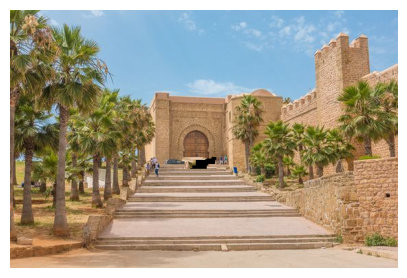

Iteration 150 completed


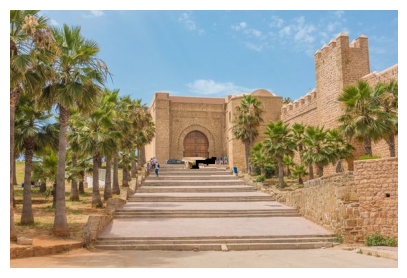

Iteration 160 completed


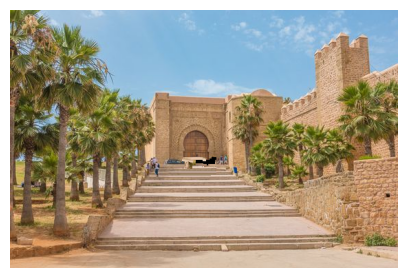

Iteration 170 completed


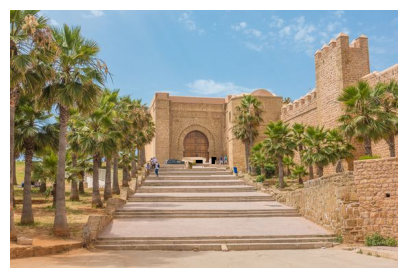

Iteration 180 completed


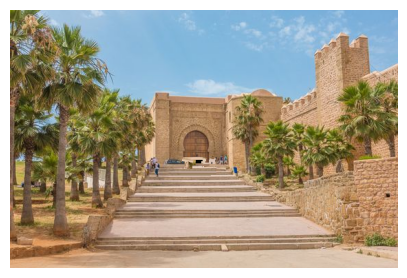

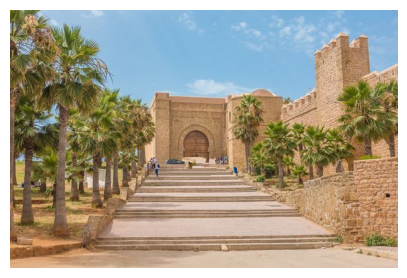

In [68]:
iterate(image, mask_1, patch_size=5)

## Post-processing Attempt

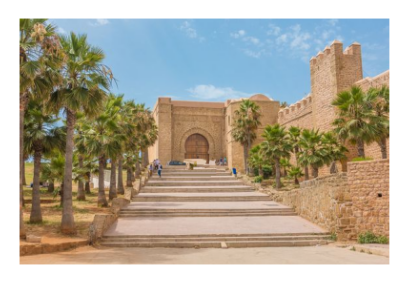

In [70]:
inpainted_image = cv2.imread('oudaya_inpainted.png', 1)
inpainted_image = cv2.cvtColor(inpainted_image, cv2.COLOR_BGR2RGB)
view_data(inpainted_image)

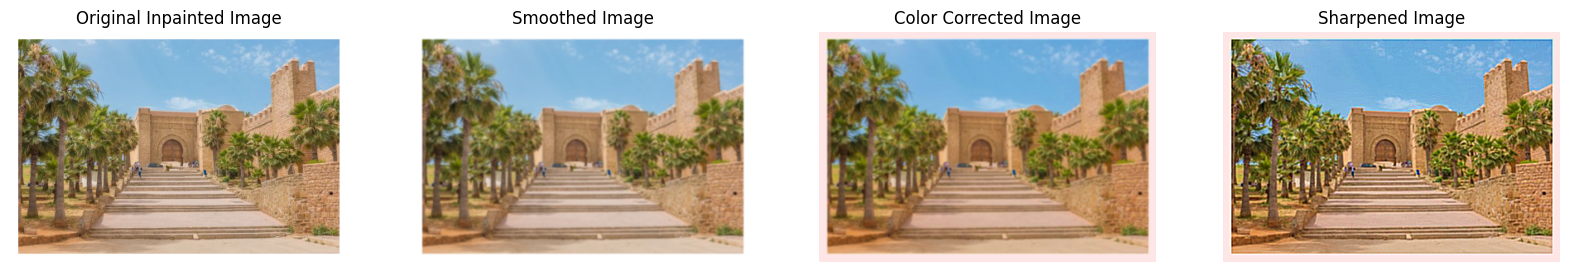

In [71]:

# Apply Gaussian Blur to smooth the image
smoothed_image = cv2.GaussianBlur(inpainted_image, (3,3), 0)

# Color Correction - Convert to HSV, adjust, and convert back (example: increase saturation)
hsv_image = cv2.cvtColor(smoothed_image, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv_image)
s = cv2.add(s, 25)  
hsv_image = cv2.merge([h, s, v])
color_corrected_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)

# Sharpening the image using a kernel

sharpen_kernel = np.array([[-0.5, -0.5, -0.5],
                           [-0.5, 5, -0.5],
                           [-0.5, -0.5, -0.5]])

sharpened_image = cv2.filter2D(color_corrected_image, -1, sharpen_kernel)

# Plotting the images
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
ax = axes.ravel()

ax[0].imshow(inpainted_image)
ax[0].set_title('Original Inpainted Image')
ax[0].axis('off')

ax[1].imshow(smoothed_image)
ax[1].set_title('Smoothed Image')
ax[1].axis('off')

ax[2].imshow(color_corrected_image)
ax[2].set_title('Color Corrected Image')
ax[2].axis('off')

ax[3].imshow(sharpened_image)
ax[3].set_title('Sharpened Image')
ax[3].axis('off')

plt.show()
